<a href="https://colab.research.google.com/github/Njeru58/Arduino-staking-BOT/blob/main/Copy_of_easy_ml_tutorial_1_linear_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EASY-ML Tutorial 1: Linear Regressor

An implementation of a linear regression algorithm.

From: https://clairedavid.github.io/intro_to_ml/tutorials/t01_linear_regression.html

## 1. Get the data
Let's first __mount__ the drive to access the data file. This is necessary because Google Colab is not linked to any directory.  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's find the file using commands. This is a very useful skill because you may not have access to a graphic interface while login into a server.
Bash is the command language interpreter for the operating system. Some useful commands:  
`pwd` = print working directory

Note: on a Colab book, the default language is python. To tell Colab this is bash, we have to put an exclamation mark or percent sign before the command:

In [ ]:
!pwd

/content


What is there? Let's list file using the `ls` command:

In [ ]:
!ls

gdrive	sample_data


Let's go to the folder sample_data (yours may be different!)

In [ ]:
%cd /content/gdrive/MyDrive/data/

/content/gdrive/MyDrive/data


In [ ]:
!ls

data_atlas_higgs_4lep  ml_a3		ml_tuto_1    tutorial_1.csv
ml_a1		       ml-latest-small	test_folder


You now know how to navigate between folders to locate your file. Go to your Drive to check where it is (with a graphic interface). What you do here is to access it in "command line", without any graphic interface. The location of your data file is called the "path".
For me, as I created a data folder, it is this:

In [ ]:
path = "/content/gdrive/MyDrive/data/ml_tuto_1/"

%ls -l $path

total 2
-rw------- 1 root root 1839 Nov  7  2022 tutorial_1.csv


I have stored the path into a python variable. When call the bash command `ls`, I convert that variable for bash with a `$` symbol at front. The option `-l` is to get a detailed list of the file. Here I can see the size (1839 bytes) and when it was created, on November 7, 2022.

Now let's sneak peak into the file! For this, we will use the `head` command, that is showing the first line of a text file. We can add the option `-n` to give the number of lines we want to show:

In [ ]:
data_file = "tutorial_1.csv"

!head -n 10 $path$data_file

x,y
5.4881350392732475,29.65450786127179
7.151893663724195,34.99358978951999
6.027633760716439,35.99427342345802
5.448831829968968,24.815775427356154
4.236547993389047,21.034959534504537
6.458941130666561,29.44885970151621
4.375872112626925,26.03457170516168
8.917730007820797,40.20383605668101
9.636627605010293,45.209618148604235


Cool! We can see the start of the file's content! Now how many lines is our file? For this, we will use the command `wc` as "word count" with the option `-l` (lines):

In [ ]:
!wc -l $path$data_file

51 /content/gdrive/MyDrive/data/ml_tuto_1/tutorial_1.csv


So we have a header row `x,y` and then 50 data points!

Let's pour that content into dataframes.

In [ ]:
import pandas as pd

df = pd.read_csv(path + data_file)
df.head()

,x,y
0,5.488135,29.654508
1,7.151894,34.993590
2,6.027634,35.994273
3,5.448832,24.815775
4,4.236548,21.034960


Dataframes are very handy to visualize the dataset. Feel free to practice on this. Now we want fast computations: we will create a Numpy array for each column.

In [ ]:
import numpy as np

x = df['x'].to_numpy()
y = df['y'].to_numpy()

## 2. Plot the data

Always good to see the data. We use `matplotlib` for that.

<span style="color:red">A plot should always have labelled axes!</span>

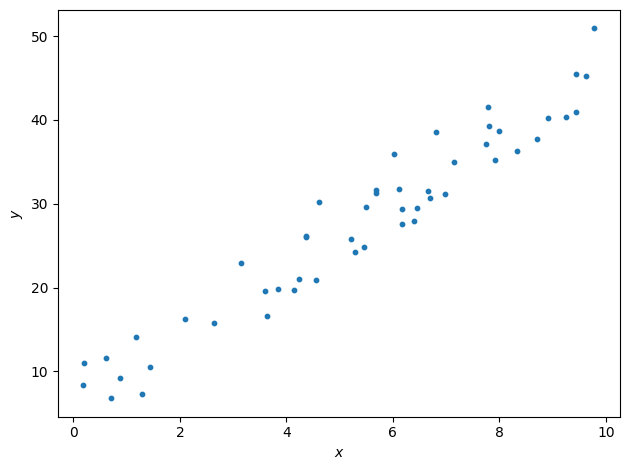

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x, y, s=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.tight_layout()

## 3. Functions

Functions in programming are making a code versatile and easier to read.

__Hypothesis function__

In [ ]:
def h_lin(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

__Cost function__

It's very important to ask yourself before coding what comes as input in the cost function, what is the output. Here we need the model parameters $\theta_0$, $\theta_1$ and the Numpy arrays of x and y.

I will show you two ways of coding it:
- one more detailed, manual way with the for loop visible
- one more pro and automated with the Numpy arrays back-stage machinery doing all computations 'vectorized' (the loop is implied).

Note: I prefer to add the suffix "_vals", short for values, to know that my function will handle a list (python list or the fancy Numpy array).

In [ ]:
# cost function with the loop
def costFunctionLinReg_loop(x_vals, y_vals, theta_0, theta_1):

  m = len(x_vals)
  if m != len(y_vals):
    raise ValueError('The lists of x and y values are not the same length!')

  sum_error_squared = 0

  for x , y in zip(x_vals, y_vals):
    sum_error_squared  += ( h_lin(theta_0, theta_1, x) - y )**2

  return (1/(2 * m)) * sum_error_squared


# A more pro way of coding, the Numpy way:

def costFunctionLinRegression(x_vals, y_vals, theta_0, theta_1):

  m = len(x_vals)
  if m != len(y_vals):
    raise ValueError('The lists of x and y values are not the same length!')

  # Creation of a Numpy array storing the error squared for each data row:
  summand = (h_lin(theta_0, theta_1, x_vals) - y_vals)**2

  # The sum is done using np.sum()
  return (1/(2*m)) * np.sum(summand, axis=0)

Let's test or function (the pro one). For this we will use the dataset seen in class.

In [ ]:
x_test = np.array([1, 2, 3, 4])
y_test = np.array([2, 4, 6, 8])

# No intercept term
theta_0 = 0

# List of values for theta 1:
theta_1_vals = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]

for theta_1 in theta_1_vals:
    cost = costFunctionLinRegression(x_test, y_test, theta_0, theta_1)
    print(f"With theta 1 = {theta_1:.1f}\tcost = {cost:.2f}")

With theta 1 = 0.0	cost = 15.00
With theta 1 = 0.5	cost = 8.44
With theta 1 = 1.0	cost = 3.75
With theta 1 = 1.5	cost = 0.94
With theta 1 = 2.0	cost = 0.00
With theta 1 = 2.5	cost = 0.94
With theta 1 = 3.0	cost = 3.75
With theta 1 = 3.5	cost = 8.44


__Residuals__  
The difference between the predictions and the real values. Not squared. We will use this as part of the derivative of the cost function (if you look at the equation, the square will disappear).


In [ ]:
def get_residuals(x_vals, y_vals, theta_0, theta_1):
    return h_lin(theta_0, theta_1, x_vals) - y_vals

Here this function is not returning a number but a Numpy array!

Let's test this function and for better visualization, store its results into a dataframe:

In [ ]:
for theta_1 in theta_1_vals[2:6]: # getting only the 3rd to the 7th element
  preds = h_lin(theta_0, theta_1, x_test)
  residuals = get_residuals(x_test, y_test, theta_0, theta_1)

  # Visualization with a dataframe:
  df_res = pd.DataFrame( {"x values": x_test,
                          "predictions": preds,
                          "y values": y_test,
                          "residuals": residuals} )
  print(f"\nWith theta 1 = {theta_1}")
  print(df_res)


With theta 1 = 1
   x values  predictions  y values  residuals
0         1            1         2         -1
1         2            2         4         -2
2         3            3         6         -3
3         4            4         8         -4

With theta 1 = 1.5
   x values  predictions  y values  residuals
0         1          1.5         2       -0.5
1         2          3.0         4       -1.0
2         3          4.5         6       -1.5
3         4          6.0         8       -2.0

With theta 1 = 2
   x values  predictions  y values  residuals
0         1            2         2          0
1         2            4         4          0
2         3            6         6          0
3         4            8         8          0

With theta 1 = 2.5
   x values  predictions  y values  residuals
0         1          2.5         2        0.5
1         2          5.0         4        1.0
2         3          7.5         6        1.5
3         4         10.0         8        2.0


We can see that the residual function is doing its job! No residual for the case $\theta_1$ = 2. And same errors with a flipped sign for $\theta_1$ = 1.5 and $\theta_1$ = 2.5, which is what we expect.

## 4. Regressor

I am helping you a bit.
- I give you a snippet (= small block of code) to help you print out some of your variables.
- I chose for you the hyperparameters that will make sure your Gradient Descent will converge and picking the initial values for the model parameters:

In [ ]:
def print_every(iter_index, first_step, second_step, index_changing_step):
    if first_step <= 0 or second_step <= 0:
        raise ValueError("Steps must be positive integers.")

    if iter_index == 0:
        return True  # Always print at the first iteration

    if iter_index <= index_changing_step:
        return iter_index % first_step == 0
    else:
        return iter_index % second_step == 0

In [ ]:
# Hyperparameters
alpha = 0.05
N = 1000

# Initialization
theta_0 = 25
theta_1 = 0

# Check lists of x and y are of same length:
m = len(x) # sample size
if m != len(y): raise ValueError('The lists of x and y values are not the same length!')

# Store theta (weights) values for Gradient Descent (GD) visualizations
GD_all_thetas_0 = np.array([theta_0])
GD_all_thetas_1 = np.array([theta_1])

print("Starting gradient descent\n")

# -------------------
#  Start iterations
# -------------------
for n in range(N):
    # Compute residuals and gradient components
    residuals = get_residuals(x, y, theta_0, theta_1)

    sum_residuals   = np.sum(residuals)         # ∂J/∂θ₀ (unnormalized)
    sum_residuals_x = np.sum(residuals * x)     # ∂J/∂θ₁ (unnormalized)

    # Normalize gradients
    grad_theta0 = (1/m) * sum_residuals
    grad_theta1 = (1/m) * sum_residuals_x

    # Gradient descent update rules
    theta_0_new = theta_0 - alpha * grad_theta0
    theta_1_new = theta_1 - alpha * grad_theta1

    # Store thetas (for plotting)
    GD_all_thetas_0 = np.append(GD_all_thetas_0, theta_0_new)
    GD_all_thetas_1 = np.append(GD_all_thetas_1, theta_1_new)

    # Compute cost (for printouts)
    cost = costFunctionLinRegression(x, y, theta_0_new, theta_1_new)

    # Pretty print: every 10 iters
    # after 100 iterations, print every 100 iterations
    if print_every(n, 10, 100, 100):
        print(
            f"Iter {n:>4}\t"
            f"θ₀ = {theta_0_new:>7.3f}\t∂J/∂θ₀ = {grad_theta0:>8.4f}\t"
            f"θ₁ = {theta_1_new:>7.3f}\t∂J/∂θ₁ = {grad_theta1:>8.4f}\t"
            f"Cost = {cost:>8.5f}"
        )

    # Update the parameters for next iteration
    theta_0 = theta_0_new
    theta_1 = theta_1_new

    # Exit condition
    if abs(sum_residuals) < 0.001 and abs(sum_residuals_x) < 0.001:
        print("\n ! The derivatives are zero! Exiting gradient descent.")
        break

  #___________________________

print(f"\nEnd of gradient descent after {n+1} iterations")

Starting gradient descent

Iter    0	θ₀ =  25.130	∂J/∂θ₀ =  -2.5948	θ₁ =   2.146	∂J/∂θ₁ = -42.9159	Cost = 56.84502
Iter   10	θ₀ =  23.260	∂J/∂θ₀ =   1.9969	θ₁ =   1.640	∂J/∂θ₁ =  -9.6267	Cost = 33.25208
Iter   20	θ₀ =  21.647	∂J/∂θ₀ =   2.7424	θ₁ =   1.711	∂J/∂θ₁ =  -2.4181	Cost = 27.31331
Iter   30	θ₀ =  20.205	∂J/∂θ₀ =   2.6824	θ₁ =   1.889	∂J/∂θ₁ =  -0.8322	Cost = 23.07411
Iter   40	θ₀ =  18.904	∂J/∂θ₀ =   2.4700	θ₁ =   2.075	∂J/∂θ₁ =  -0.4608	Cost = 19.63395
Iter   50	θ₀ =  17.729	∂J/∂θ₀ =   2.2437	θ₁ =   2.248	∂J/∂θ₁ =  -0.3540	Cost = 16.82019
Iter   60	θ₀ =  16.665	∂J/∂θ₀ =   2.0317	θ₁ =   2.406	∂J/∂θ₁ =  -0.3066	Cost = 14.51773
Iter   70	θ₀ =  15.703	∂J/∂θ₀ =   1.8383	θ₁ =   2.549	∂J/∂θ₁ =  -0.2745	Cost = 12.63362
Iter   80	θ₀ =  14.833	∂J/∂θ₀ =   1.6630	θ₁ =   2.678	∂J/∂θ₁ =  -0.2477	Cost = 11.09184
Iter   90	θ₀ =  14.045	∂J/∂θ₀ =   1.5044	θ₁ =   2.795	∂J/∂θ₁ =  -0.2239	Cost =  9.83019
Iter  100	θ₀ =  13.333	∂J/∂θ₀ =   1.3609	θ₁ =   2.901	∂J/∂θ₁ =  -0.2025	Cost =  8.79778
Iter 

## 6. Visualizing the Gradient Descent

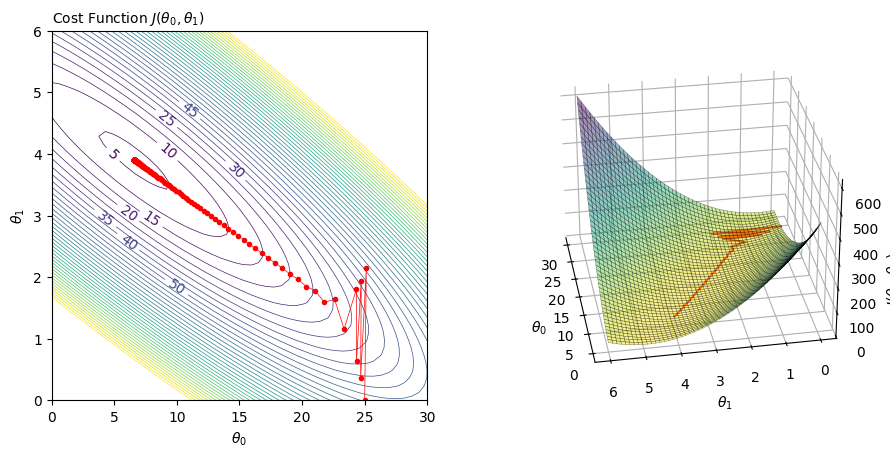

In [ ]:
# Grid for 2D parameter space:
theta_0_grid = np.linspace(0, 30, 50)
theta_1_grid = np.linspace(0, 6, 50)

# Z values of costs for the surface:
Theta0, Theta1 = np.meshgrid(theta_0_grid, theta_1_grid)
Costs = costFunctionLinReg_loop( x, y, Theta0, Theta1 )

# Gradient descent: 5 first params then every 10 epochs
theta_0_pts = np.concatenate((GD_all_thetas_0[0:5], GD_all_thetas_0[5::5]), axis=None)
theta_1_pts = np.concatenate((GD_all_thetas_1[0:5], GD_all_thetas_1[5::5]), axis=None)

# Cost for selected intermediary weights:
Costs_wGD = costFunctionLinReg_loop(x, y, theta_0_pts, theta_1_pts)

plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure(figsize=plt.figaspect(0.45)) # 16,4

#==========================
#     Contour plot
#==========================
plt.rcParams.update(plt.rcParamsDefault)

# Custom cost levels, from 5, step of 5, 200
levs = range(5,200,5)

ax = fig.add_subplot(1, 2, 1)

# Contour of theta parameter space:
CS = ax.contour(Theta0, Theta1, Costs, levs, linewidths=0.5)
ax.clabel(CS, CS.levels[0:10], inline=1, fontsize=10, fmt='%d')

# Add the intermediary thetas from gradient descent:
ax.plot(theta_0_pts, theta_1_pts, marker=".", c="r", lw=0.5)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 10)

#==========================
#     3D plot
#==========================
ax = fig.add_subplot(1, 2, 2, projection='3d')

# 3D surface of cost vs (theta  0, theta 1):
surf = ax.plot_surface(Theta0, Theta1, Costs, cmap='viridis_r', linewidth=0.3, alpha = 0.5, edgecolor = 'k')

# Path of intermediary thetas from gradient descent:
ax.plot(theta_0_pts, theta_1_pts, Costs_wGD, c='r')

ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0, \\theta_1)$', rotation=90)
ax.azim = 170
ax.elev = 30
ax.xaxis.set_rotate_label(False); ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_rotate_label(False); ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False); ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.show()

## Let's compare with NumPy `polyfit`

In [ ]:
slope, intercept = np.polyfit(x, y, deg=1)

In [ ]:
# Print the results:
print(f"Intercept: {intercept:.2f}\nSlope: {slope:.2f}")

Intercept: 6.58
Slope: 3.91


**All** good! :-)